In [ ]:
from google.colab import files
uploaded = files.upload()

Saving headbrain.csv to headbrain.csv


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [ ]:
x_mean = np.mean(X)
y_mean = np.mean(Y)

l = len(X)
num = 0
den = 0

for i in range(l):
  num += (X[i] - x_mean) * (Y[i] - y_mean)
  den += (X[i] - x_mean) ** 2
m = num/den
c = y_mean - (m*x_mean)
print(m,c)


0.26342933948939945 325.57342104944223


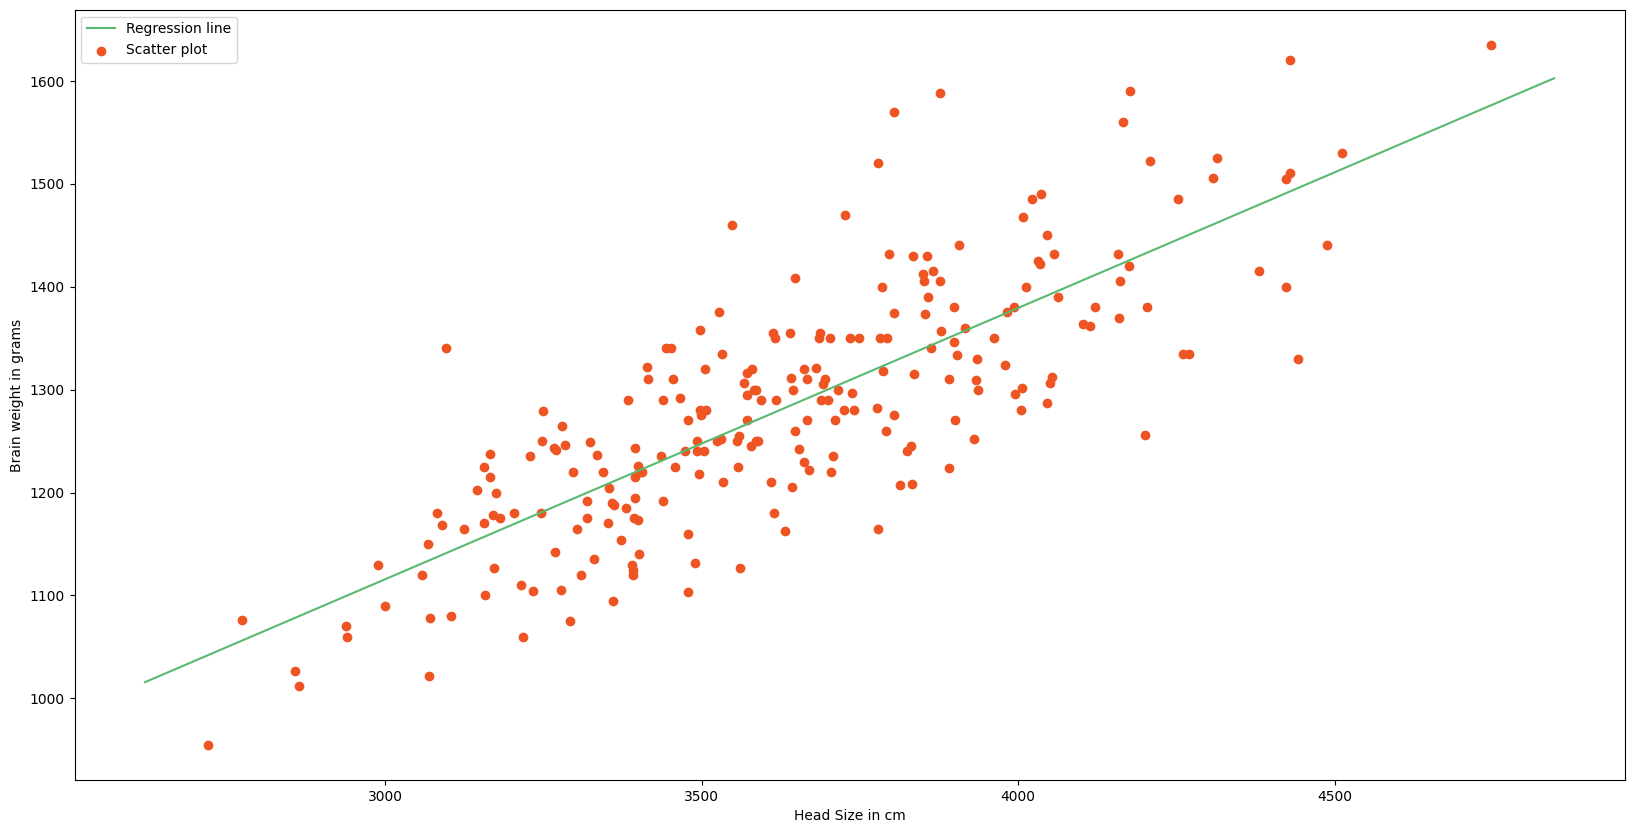

In [ ]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x,max_x,1000)
y = c+m*x

#plotting line
plt.plot(x,y,color='#58b970', label = 'Regression line')

#plotting scatter points
plt.scatter(X,Y, c = '#ef5423', label ='Scatter plot')

plt.xlabel('Head Size in cm')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()


In [ ]:
ss_t = 0
ss_r = 0
for i in range(l):
  y_pred = c + m * X[i]
  ss_t += (Y[i] - y_mean) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# cannot use rank 1 matrix in scikit learn
#creating model
reg = LinearRegression
#fitting training data
reg = reg.fit(X,Y)
#Y prediction
Y_pred = reg.predict(X)
#calculating r2 score
r2_score = reg.score(X,Y)
print(r2_score)

TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'